In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [7]:
from pathlib import Path
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import shapefile
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon as pltPolygon
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon


class TreeGrid2D:
    def __init__(self, shape_file_name: str):

        self.file_name = shape_file_name

        self.raw_polygon_data = self._extract_polygon_data()

        self.polygon_list = self._extract_polygon()

    def _extract_polygon_data(self) -> List[List[Tuple]]:
        """The only one time open this shapefile.

        Read and store the list of polygon in "raw_polygon_data"

        Return: 
            list of polygon, where each polygon is a list of tuple,(x:float,y:float)
        """
        polygon_data = []
        print(self.file_name)
        with shapefile.Reader(self.file_name) as shp:

            for s in shp.shapeRecords():
                polygon = s.shape.points
                polygon_data.append(polygon)

        return polygon_data

    def _extract_polygon(self) -> List[Polygon]:
        """
        Use the data from 'raw_polygon_data' to constuct
            a list of shapely.geometry.polygon.Polygon object.
            Which is useful to check in a point is contain inside 
            a given polygon.

        Return:
            list of "shapely.geometry.polygon.Polygon" objects.
        """
        polygon_list = []

        for polygon_data in self.raw_polygon_data:
            polygon_list.append(Polygon(polygon_data))

        return polygon_list

    def plot(self, distance_from_center: int = 40,
             fig_size: tuple = (10, 10)) -> None:
        """
        Ploting the polygons
        """
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xlim([-distance_from_center, distance_from_center])
        ax.set_ylim([-distance_from_center, distance_from_center])
        patches = []

        for i in range(len(self.raw_polygon_data)):
            #     polygon = pltPolygon(np.random.rand(num_sides ,2), True)
            polygon = pltPolygon(np.array(self.raw_polygon_data[i]), True)
            patches.append(polygon)

        p = PatchCollection(patches, cmap=plt.cm.jet, alpha=0.4)

        # colors = 100*np.random.rand(len(patches))
        # p.set_array(np.array(colors))

        ax.add_collection(p)

        plt.show()




In [9]:
dir_name = '../polygon/shape_files/'
directory = os.listdir(dir_name)

for fname in directory:
    if fname.endswith('.shp'):
        print(fname)

SP02 Big Hill.shp
101 Sharps.shp
118 Dunse.shp
84ish seaview.shp
104 Sharps.shp
85 Seaview.shp
119 Dunse.shp
95 seaview.shp
184 Big Hill.shp
60 Bambra aireys.shp
SP03_Stony.shp
94 seaview.shp
carpark.shp
57 Bambra Aireys.shp
SP01.shp


In [10]:
fname = 'carpark.shp'

g = TreeGrid2D(dir_name + '/' + fname)


../polygon/shape_files//carpark.shp


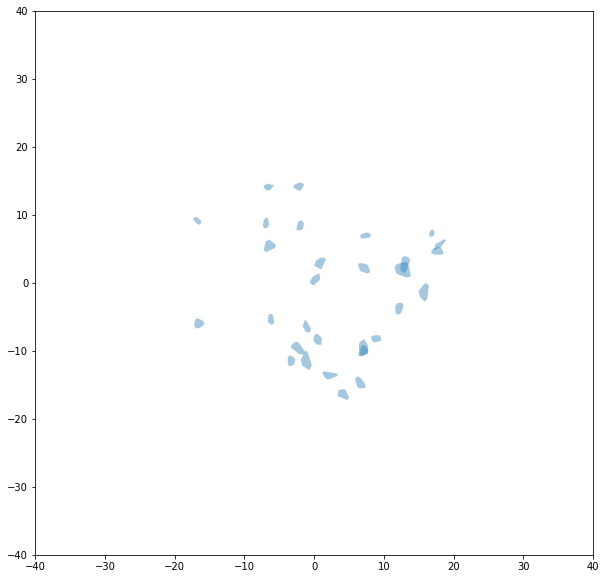

In [12]:
g.plot()

SP02 Big Hill.shp
../polygon/shape_files//SP02 Big Hill.shp


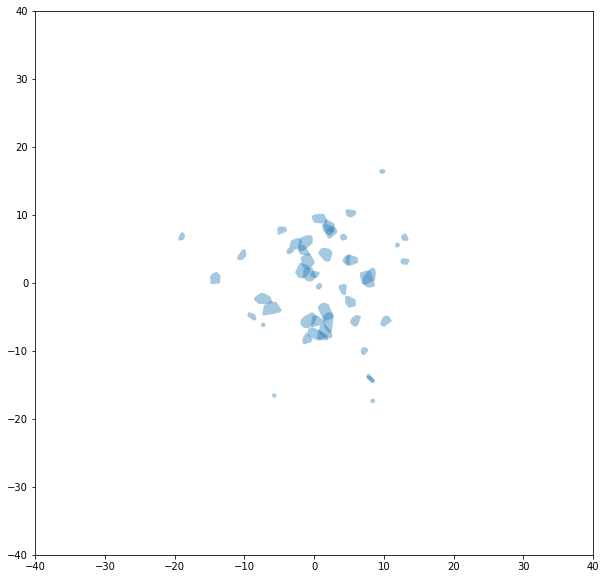

101 sharps.shp
../polygon/shape_files//101 sharps.shp


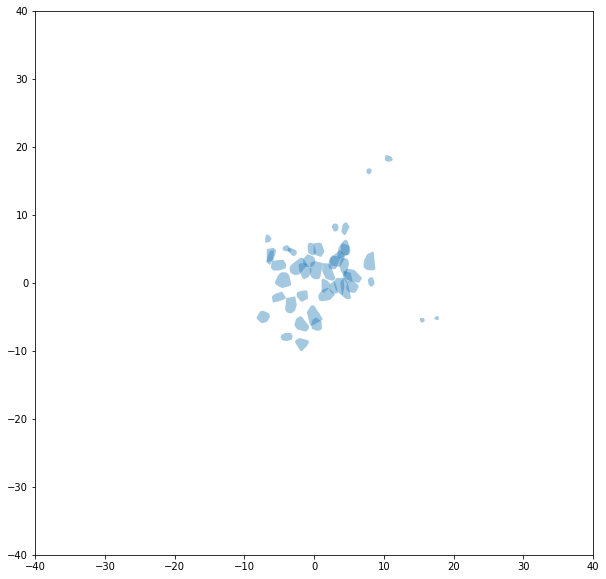

SP14_Garvey.shp
../polygon/shape_files//SP14_Garvey.shp


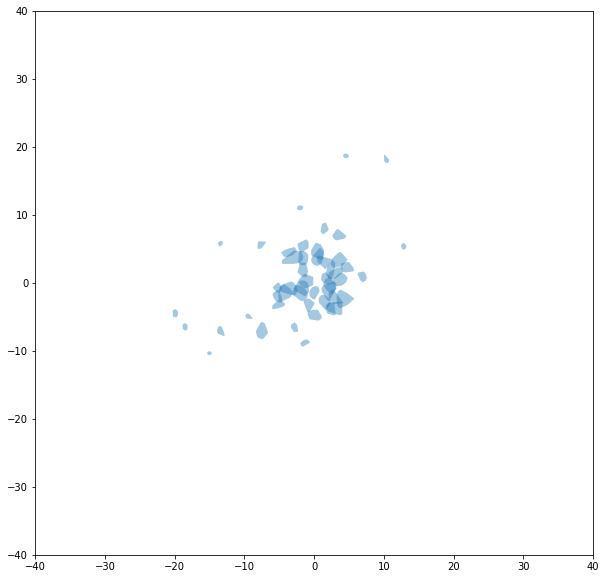

118 Dunse.shp
../polygon/shape_files//118 Dunse.shp


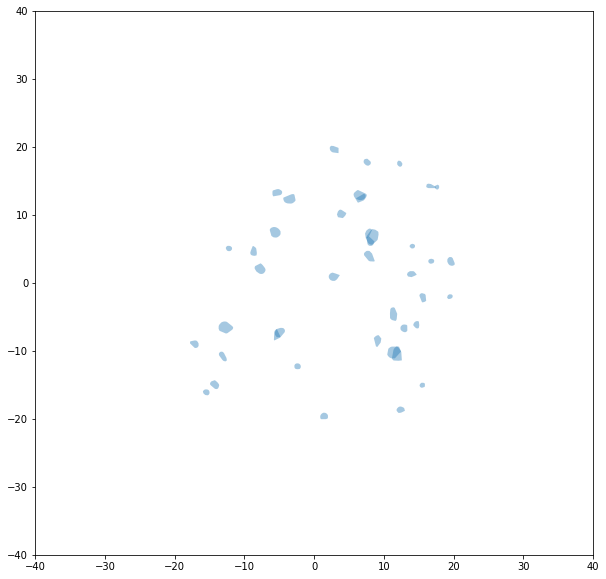

84ish seaview.shp
../polygon/shape_files//84ish seaview.shp


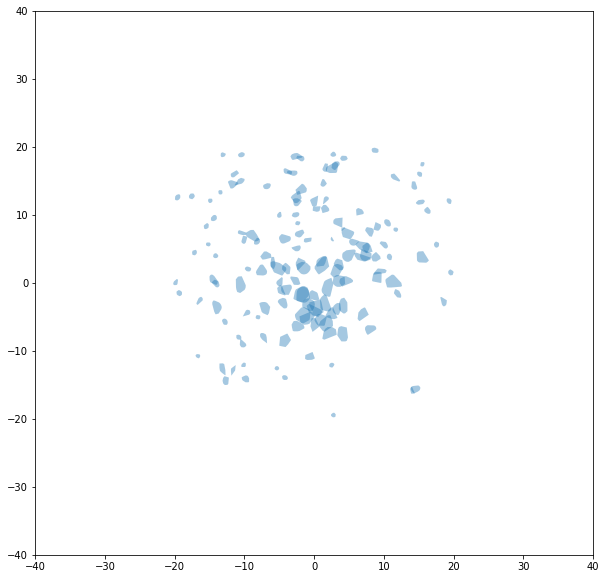

SP10_Moggs_Creek.shp
../polygon/shape_files//SP10_Moggs_Creek.shp


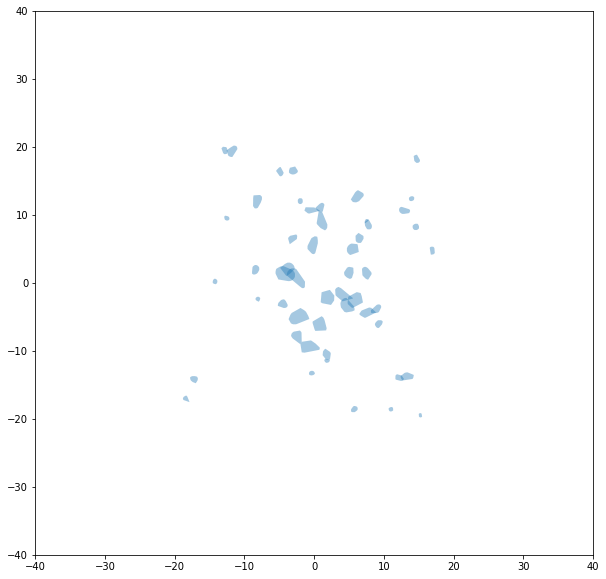

104 sharps.shp
../polygon/shape_files//104 sharps.shp


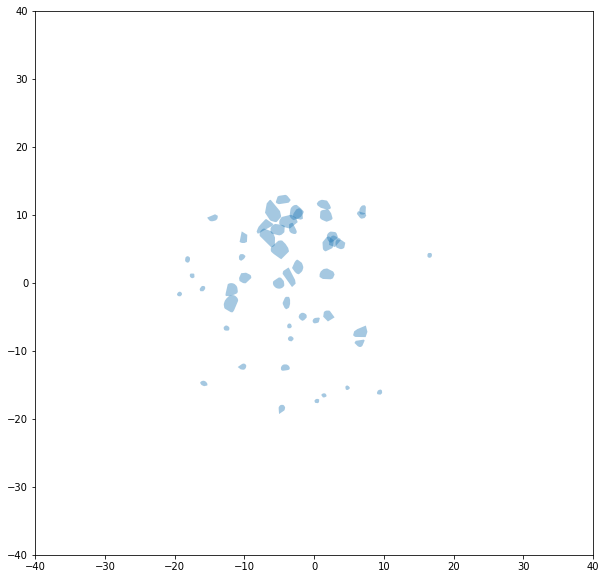

SP09_Coalmine_ck.shp
../polygon/shape_files//SP09_Coalmine_ck.shp


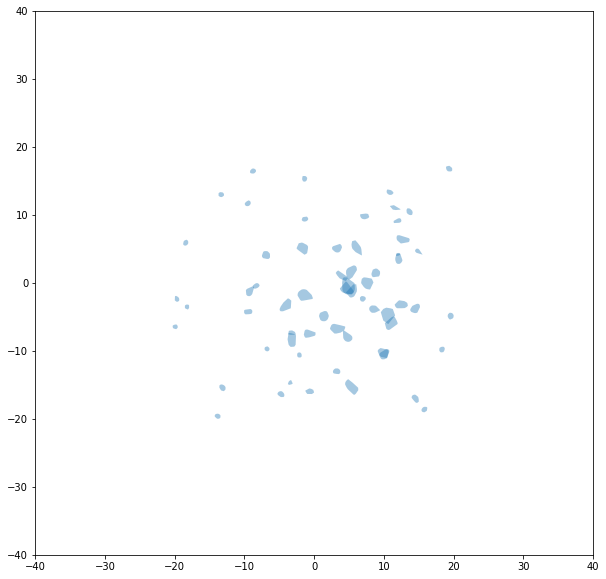

85 Seaview.shp
../polygon/shape_files//85 Seaview.shp


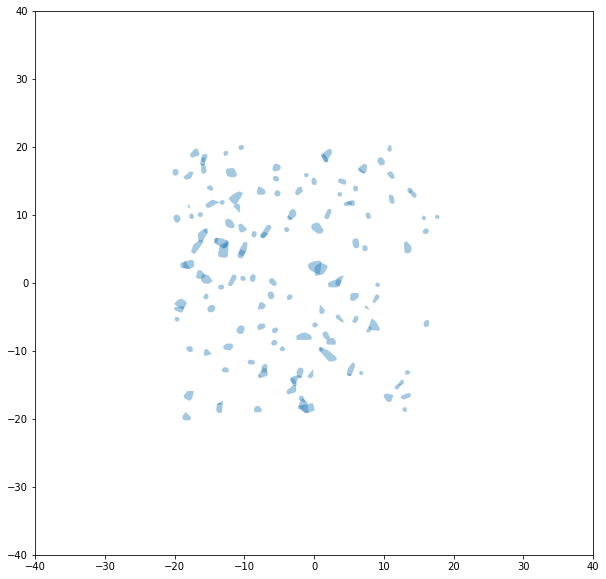

119 Dunse.shp
../polygon/shape_files//119 Dunse.shp


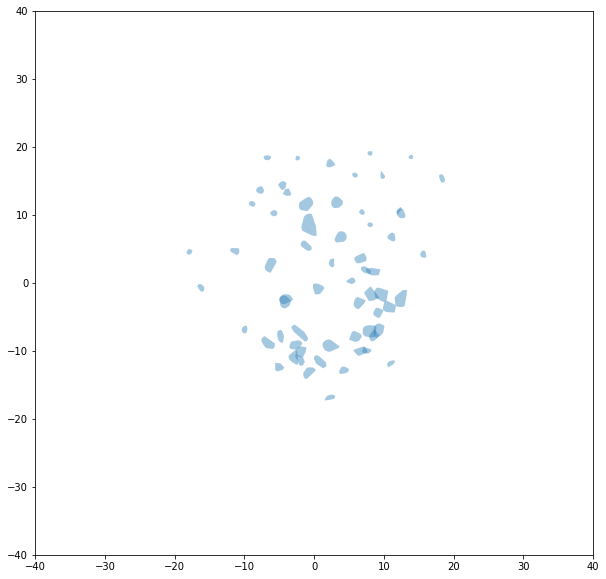

95 seaview.shp
../polygon/shape_files//95 seaview.shp


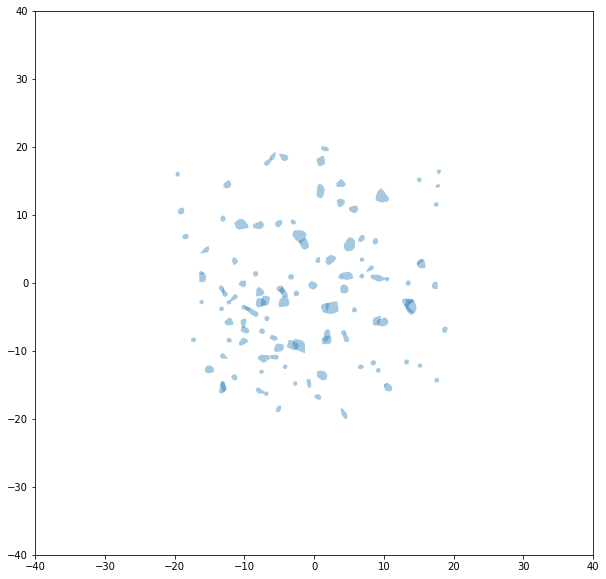

184 Big Hill.shp
../polygon/shape_files//184 Big Hill.shp


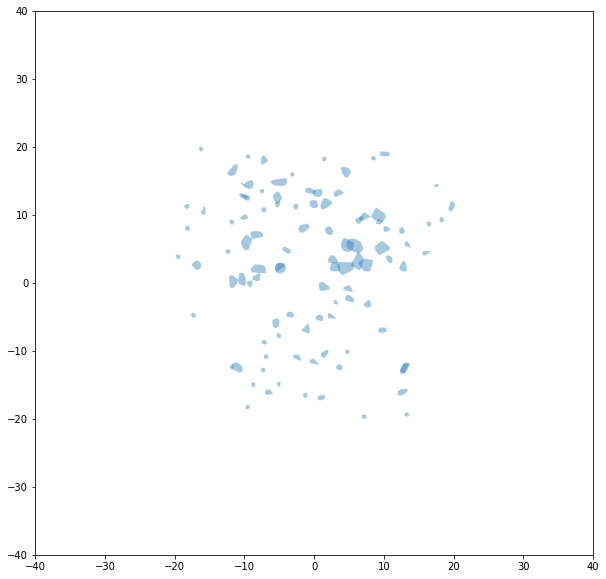

60 Bambra aireys.shp
../polygon/shape_files//60 Bambra aireys.shp


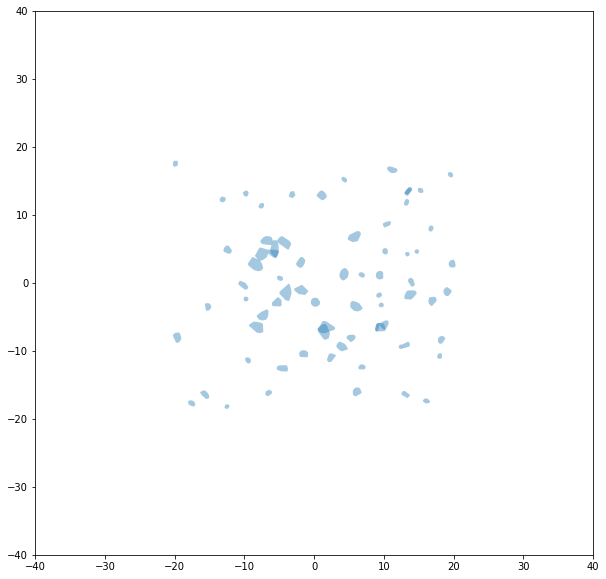

SP03_Stony.shp
../polygon/shape_files//SP03_Stony.shp


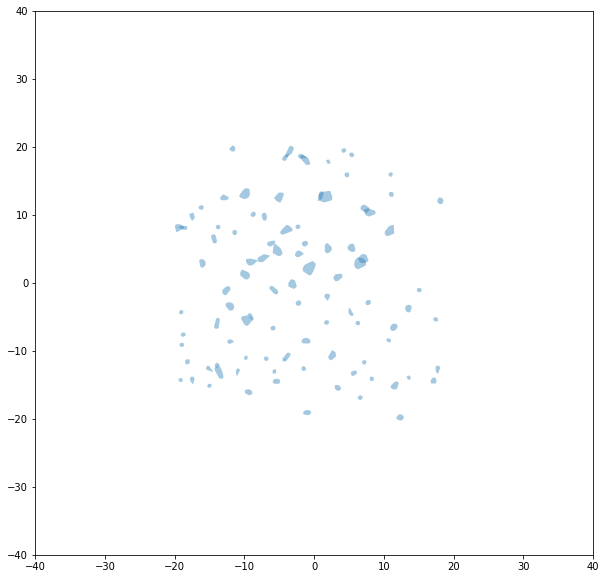

94 seaview.shp
../polygon/shape_files//94 seaview.shp


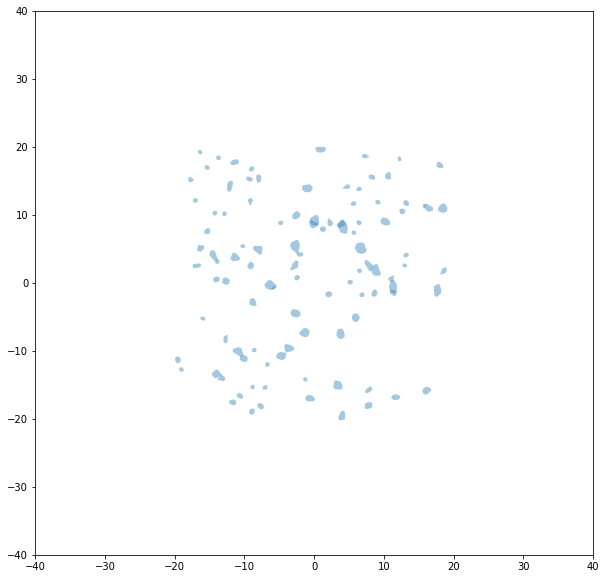

carpark.shp
../polygon/shape_files//carpark.shp


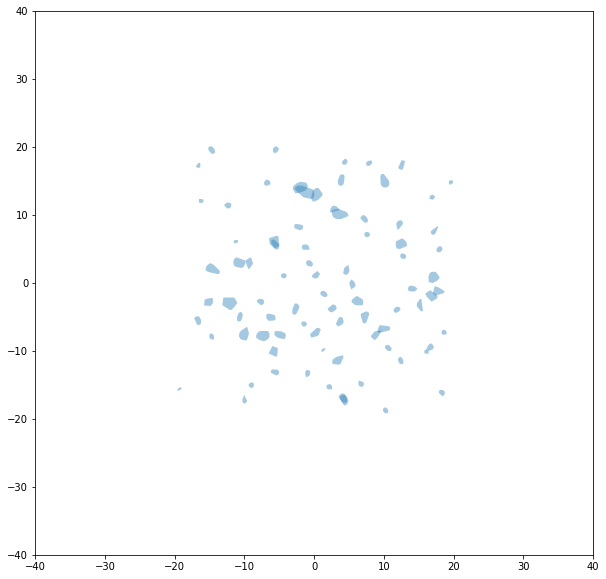

57 Bambra Aireys.shp
../polygon/shape_files//57 Bambra Aireys.shp


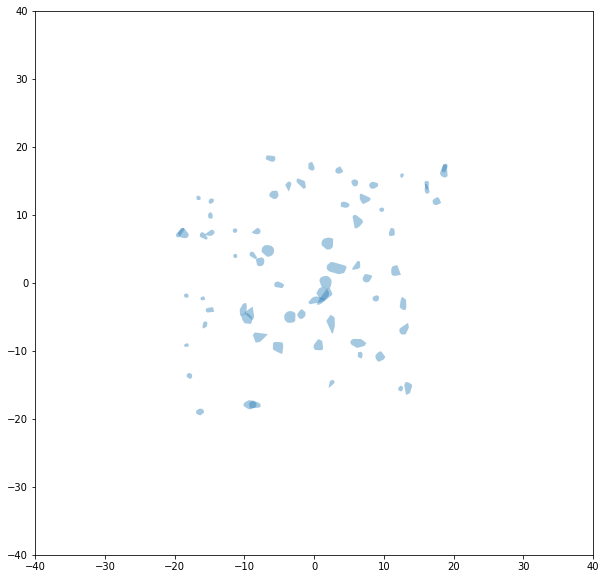

SP01.shp
../polygon/shape_files//SP01.shp


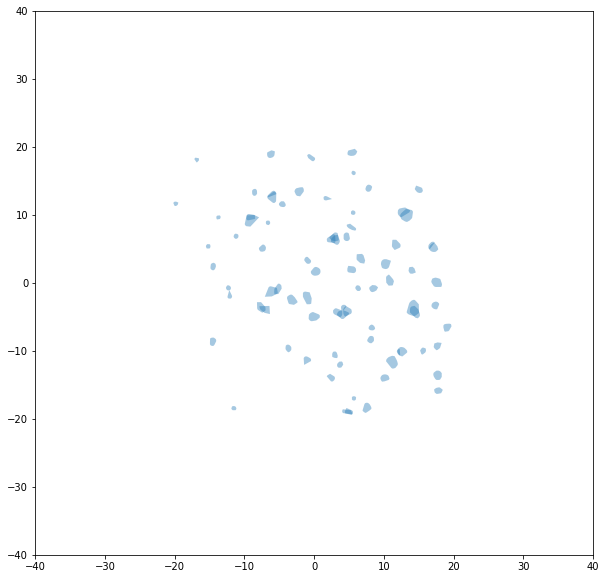

In [18]:
directory = os.listdir(dir_name)

for fname in directory:
    if fname.endswith('.shp'):
        print(fname)
        g = TreeGrid2D(dir_name + '/' + fname)
        g.plot()